In [ ]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
# # Load the CASIA V1 dataset
# import numpy as np
# import cv2
# import os

# data_dir = '/content/drive/MyDrive/CASIA1'
# images = []
# labels = []
# for subdir in os.listdir(data_dir):
#     sub_dir_path = os.path.join(data_dir, subdir)
#     if os.path.isdir(sub_dir_path):
#         for file in os.listdir(sub_dir_path):
#             if file.endswith('.jpg'):
#                 image_path = os.path.join(sub_dir_path, file)
#                 image = cv2.imread(image_path)
#                 images.append(image)
#                 if 'Au' in subdir:
#                     labels.append(1)  # authentic image
#                 else:
#                     labels.append(0)  # tampered image

In [ ]:
import numpy as np
import cv2
import os

data_dir = '/content/drive/MyDrive/CASIA1'
images = []
labels = []
num_authentic = 50  # define the desired number of authentic images
num_tampered = 50  # define the desired number of tampered images
count_authentic = 0  # initialize a counter variable for authentic images
count_tampered = 0  # initialize a counter variable for tampered images
for subdir in os.listdir(data_dir):
    sub_dir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(sub_dir_path):
        for file in os.listdir(sub_dir_path):
            if file.endswith('.jpg'):
                image_path = os.path.join(sub_dir_path, file)
                image = cv2.imread(image_path)
                if 'Au' in subdir and count_authentic < num_authentic:
                    images.append(image)
                    labels.append(1)  # authentic image
                    count_authentic += 1  # increment the counter variable for authentic images
                elif 'Sp' in subdir and count_tampered < num_tampered:
                    images.append(image)
                    labels.append(0)  # tampered image
                    count_tampered += 1  # increment the counter variable for tampered images
                if count_authentic == num_authentic and count_tampered == num_tampered:
                    break  # break the loop if the desired number of authentic and tampered images have been loaded
        if count_authentic == num_authentic and count_tampered == num_tampered:
            break


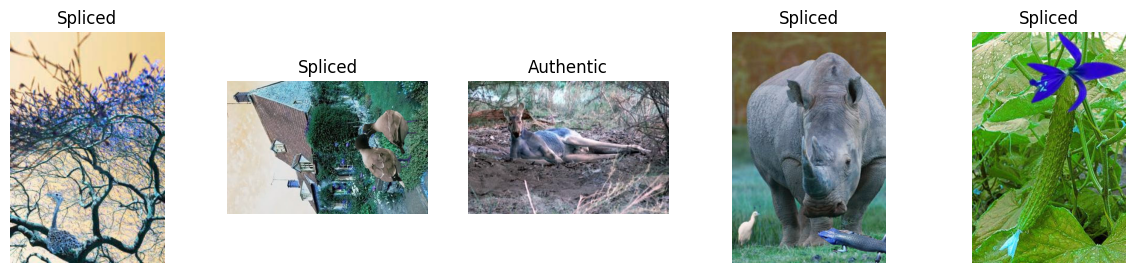

In [ ]:
import random
import matplotlib.pyplot as plt

# define the number of images to display
num_images = 5

# randomly select num_images indices from the dataset
indices = random.sample(range(len(images)), num_images)

# plot the selected images along with their labels
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

for i, idx in enumerate(indices):
    axes[i].imshow(images[idx])
    axes[i].axis('off')
    if labels[idx] == 1:
        axes[i].set_title("Authentic")
    else:
        axes[i].set_title("Spliced")
    
plt.show()


In [ ]:
# def preprocess(img): 
#     # Convert the image to floating-point format with 1 channel
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = np.float32(img)
#     # Apply non-overlapping 8x8 block-wise DCT
#     img_dct = np.zeros_like(img)
#     for i in range(0, img.shape[0], 8):
#         for j in range(0, img.shape[1], 8):
#             img_dct[i:i+8, j:j+8] = cv2.dct(img[i:i+8, j:j+8])

#     # Round DCT coefficients to nearest integer values
#     img_dct = np.round(img_dct)

#     # Calculate decorrelation features
#     Dhintra = img_dct[:-1, :] - img_dct[1:, :]
#     Dvintra = img_dct[:, :-1] - img_dct[:, 1:]
#     Dhinter = img_dct[:-8, :] - img_dct[8:, :]
#     Dvinter = img_dct[:, :-8] - img_dct[:, 8:]

#     return Dhintra, Dvintra, Dhinter, Dvinter

In [ ]:
# import cv2
# import numpy as np

# def preprocess(img): 
#     # Convert the image to YCbCr color space
#     img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#     # Extract the Cr channel
#     img_cr = img_ycrcb[:,:,1]
#     # Convert the image to floating-point format
#     img_cr = np.float32(img_cr)
#     # Apply non-overlapping 8x8 block-wise DCT
#     img_dct = np.zeros_like(img_cr)
#     for i in range(0, img_cr.shape[0], 8):
#         for j in range(0, img_cr.shape[1], 8):
#             img_dct[i:i+8, j:j+8] = cv2.dct(img_cr[i:i+8, j:j+8])
#     # Round DCT coefficients to nearest integer values
#     img_dct = np.round(img_dct)
#     # Calculate decorrelation features
#     Dhintra = img_dct[:-1, :] - img_dct[1:, :]
#     Dvintra = img_dct[:, :-1] - img_dct[:, 1:]
#     Dhinter = img_dct[:-8, :] - img_dct[8:, :]
#     Dvinter = img_dct[:, :-8] - img_dct[:, 8:]
    
#     return Dhintra, Dvintra, Dhinter, Dvinter


In [ ]:
import cv2
import numpy as np

def preprocess(img): 
    # Convert the image to YCbCr color space
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    # Extract the Cr channel
    img_y, img_cr, img_cb = cv2.split(img_ycrcb)
    # Convert the channels to floating-point format
    img_y = np.float32(img_y)
    img_cr = np.float32(img_cr)
    img_cb = np.float32(img_cb)
    # Apply non-overlapping 8x8 block-wise DCT to each channel
    img_y_dct = np.zeros_like(img_y)
    img_cr_dct = np.zeros_like(img_cr)
    img_cb_dct = np.zeros_like(img_cb)
    for i in range(0, img_y.shape[0], 8):
        for j in range(0, img_y.shape[1], 8):
            img_y_dct[i:i+8, j:j+8] = cv2.dct(img_y[i:i+8, j:j+8])
            img_cr_dct[i:i+8, j:j+8] = cv2.dct(img_cr[i:i+8, j:j+8])
            img_cb_dct[i:i+8, j:j+8] = cv2.dct(img_cb[i:i+8, j:j+8])
    # Round DCT coefficients to nearest integer values for each channel
    img_y_dct = np.round(img_y_dct)
    img_cr_dct = np.round(img_cr_dct)
    img_cb_dct = np.round(img_cb_dct)
    # Calculate decorrelation features for each channel
    Dhintra_y = img_y_dct[:-1, :] - img_y_dct[1:, :]
    Dvintra_y = img_y_dct[:, :-1] - img_y_dct[:, 1:]
    Dhinter_y = img_y_dct[:-8, :] - img_y_dct[8:, :]
    Dvinter_y = img_y_dct[:, :-8] - img_y_dct[:, 8:]
    
    Dhintra_cr = img_cr_dct[:-1, :] - img_cr_dct[1:, :]
    Dvintra_cr = img_cr_dct[:, :-1] - img_cr_dct[:, 1:]
    Dhinter_cr = img_cr_dct[:-8, :] - img_cr_dct[8:, :]
    Dvinter_cr = img_cr_dct[:, :-8] - img_cr_dct[:, 8:]
    
    Dhintra_cb = img_cb_dct[:-1, :] - img_cb_dct[1:, :]
    Dvintra_cb = img_cb_dct[:, :-1] - img_cb_dct[:, 1:]
    Dhinter_cb = img_cb_dct[:-8, :] - img_cb_dct[8:, :]
    Dvinter_cb = img_cb_dct[:, :-8] - img_cb_dct[:, 8:]
    
    return Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb


In [ ]:
#Function to apply the Markov random process
def apply_markov_process(Dh_intra, Dv_intra, Dh_inter, Dv_inter, threshold=8):
    # Resize the matrices to the same size
    min_rows = min(Dh_intra.shape[0], Dv_intra.shape[0], Dh_inter.shape[0], Dv_inter.shape[0])
    min_cols = min(Dh_intra.shape[1], Dv_intra.shape[1], Dh_inter.shape[1], Dv_inter.shape[1])
    Dh_intra = Dh_intra[:min_rows, :min_cols]
    Dv_intra = Dv_intra[:min_rows, :min_cols]
    Dh_inter = Dh_inter[:min_rows, :min_cols]
    Dv_inter = Dv_inter[:min_rows, :min_cols]
    # Apply the Markov random process
    markov_matrix = np.zeros(Dh_intra.shape)
    for i in range(1, Dh_intra.shape[0]):
        for j in range(1, Dh_intra.shape[1]):
            if abs(Dh_intra[i, j]) > threshold or abs(Dv_intra[i, j]) > threshold or abs(Dh_inter[i, j]) > threshold or abs(Dv_inter[i, j]) > threshold:
                markov_matrix[i, j] = 1
    return markov_matrix

In [ ]:
# def calculate_transition_probabilities(Dh_intra, Dv_intra, Dh_inter, Dv_inter, threshold=8):
#     # Resize the matrices to the same size
#     min_rows = min(Dh_intra.shape[0], Dv_intra.shape[0], Dh_inter.shape[0], Dv_inter.shape[0])
#     min_cols = min(Dh_intra.shape[1], Dv_intra.shape[1], Dh_inter.shape[1], Dv_inter.shape[1])
#     Dh_intra = Dh_intra[:min_rows, :min_cols]
#     Dv_intra = Dv_intra[:min_rows, :min_cols]
#     Dh_inter = Dh_inter[:min_rows, :min_cols]
#     Dv_inter = Dv_inter[:min_rows, :min_cols]
    
#     # Apply the Markov random process
#     markov_matrix = np.zeros(Dh_intra.shape)
#     for i in range(1, Dh_intra.shape[0]):
#         for j in range(1, Dh_intra.shape[1]):
#             if abs(Dh_intra[i, j]) > threshold or abs(Dv_intra[i, j]) > threshold or abs(Dh_inter[i, j]) > threshold or abs(Dv_inter[i, j]) > threshold:
#                 markov_matrix[i, j] = 1

#     # Calculate the transition probabilities
#     num_transitions = int(np.sum(markov_matrix))
#     feature_vector = np.zeros(num_transitions)
#     idx = 0
#     for i in range(markov_matrix.shape[0]):
#         for j in range(markov_matrix.shape[1]):
#             if i == 0 or j == 0:
#                 continue
#             if markov_matrix[i, j] == 1:
#                 feature_vector[idx] += 1
#                 idx += 1
#     feature_vector /= num_transitions

#     return feature_vector


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Preprocess the images
X_train_processed = []
for img in X_train:
    if img is not None and img.size > 0:
        #img = img.astype(np.float32) # Convert the image to 32-bit float format
        Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb = preprocess(img)
        markov_matrix1 = apply_markov_process(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
        markov_matrix2 = apply_markov_process(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
        markov_matrix3 = apply_markov_process( Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
        feature1 = markov_matrix1.flatten()
        feature2 = markov_matrix2.flatten()
        feature3 = markov_matrix3.flatten()
        features = np.concatenate((feature1, feature2, feature3), axis=0)
        X_train_processed.append(features)
    else:
        print("Invalid image encountered in training set, skipping...")

X_test_processed = []
for img in X_test:
    if img is not None and img.size > 0:
        #img = img.astype(np.float32) # Convert the image to 32-bit float format
        Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb = preprocess(img)
        markov_matrix1 = apply_markov_process(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
        markov_matrix2 = apply_markov_process(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
        markov_matrix3 = apply_markov_process( Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
        feature1 = markov_matrix1.flatten()
        feature2 = markov_matrix2.flatten()
        feature3 = markov_matrix3.flatten()
        features = np.concatenate((feature1, feature2, feature3), axis=0)
        X_test_processed.append(features)
    else:
        print("Invalid image encountered in test set, skipping...")

In [ ]:
# import numpy as np

# def get_decorrelation_matrix(Dh_intra, Dv_intra, Dh_inter, Dv_inter):
#     """
#     Compute the decorrelation matrix given the four discrete wavelet transform coefficients:
#     Dhintra, Dvintra, Dhinter, Dvinter for a particular YCbCr type
    
#     Args:
#     Dhintra: array_like, (height, width)
#         Coefficients of horizontal high pass subband obtained using intra frame prediction
#     Dvintra: array_like, (height, width)
#         Coefficients of vertical high pass subband obtained using intra frame prediction
#     Dhinter: array_like, (height, width)
#         Coefficients of horizontal high pass subband obtained using inter frame prediction
#     Dvinter: array_like, (height, width)
#         Coefficients of vertical high pass subband obtained using inter frame prediction
    
#     Returns:
#     decorrelation_matrix: array_like, (4, 4)
#         The decorrelation matrix computed from the given wavelet coefficients
#     """
#     # Resize the matrices to the same size
#     min_rows = min(Dh_intra.shape[0], Dv_intra.shape[0], Dh_inter.shape[0], Dv_inter.shape[0])
#     min_cols = min(Dh_intra.shape[1], Dv_intra.shape[1], Dh_inter.shape[1], Dv_inter.shape[1])
#     Dh_intra = Dh_intra[:min_rows, :min_cols]
#     Dv_intra = Dv_intra[:min_rows, :min_cols]
#     Dh_inter = Dh_inter[:min_rows, :min_cols]
#     Dv_inter = Dv_inter[:min_rows, :min_cols]
#     # Concatenate the four subbands into a single array
#     decorrelation_matrix  = np.stack((Dh_intra, Dv_intra, Dh_inter, Dv_inter))

#     return decorrelation_matrix

In [ ]:
# X_train_processed = []
# for img in X_train:
#     if img is not None and img.size > 0:
#         Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb = preprocess(img)
#         markov_matrix1 = apply_markov_process(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
#         markov_matrix2 = apply_markov_process(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
#         markov_matrix3 = apply_markov_process(Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
#         decorrelation_matrix1 = get_decorrelation_matrix(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
#         decorrelation_matrix2 = get_decorrelation_matrix(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
#         decorrelation_matrix3 = get_decorrelation_matrix(Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
#         feature1 = np.concatenate((markov_matrix1.flatten(), decorrelation_matrix1.flatten()))
#         feature2 = np.concatenate((markov_matrix2.flatten(), decorrelation_matrix2.flatten()))
#         feature3 = np.concatenate((markov_matrix3.flatten(), decorrelation_matrix3.flatten()))
#         features = np.concatenate((feature1, feature2, feature3), axis=0)
#         X_train_processed.append(features)
#     else:
#         print("Invalid image encountered in training set, skipping...")

# X_test_processed = []
# for img in X_test:
#     if img is not None and img.size > 0:
#         Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb = preprocess(img)
#         markov_matrix1 = apply_markov_process(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
#         markov_matrix2 = apply_markov_process(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
#         markov_matrix3 = apply_markov_process(Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
#         decorrelation_matrix1 = get_decorrelation_matrix(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
#         decorrelation_matrix2 = get_decorrelation_matrix(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
#         decorrelation_matrix3 = get_decorrelation_matrix(Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
#         feature1 = np.concatenate((markov_matrix1.flatten(), decorrelation_matrix1.flatten()))
#         feature2 = np.concatenate((markov_matrix2.flatten(), decorrelation_matrix2.flatten()))
#         feature3 = np.concatenate((markov_matrix3.flatten(), decorrelation_matrix3.flatten()))
#         features = np.concatenate((feature1, feature2, feature3), axis=0)
#         X_test_processed.append(features)
#     else:
#         print("Invalid image encountered in test set, skipping...")


In [ ]:
len(X_train_processed)

80

In [ ]:
len(X_test_processed)

20

In [ ]:
# Convert the preprocessed images to NumPy arrays
X_train_processed = np.array(X_train_processed,dtype=object)
X_test_processed = np.array(X_test_processed,dtype=object)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train_processed, y_train)

# Use the trained SVM classifier to predict labels for the train and test data
y_train_pred = clf.predict(X_train_processed)
y_test_pred = clf.predict(X_test_processed)

# Evaluate the accuracy of the SVM classifier on train and test data
train_accuracy = clf.score(X_train_processed, y_train) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Calculate the confusion matrix for the test data
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("Train Accuracy: {:.2f}%".format(train_accuracy))
print("Test Accuracy: {:.2f}%".format(test_accuracy))
print("True Positive Rate: {:.2f}%".format(tpr*100))
print("True Negative Rate: {:.2f}%".format(tnr*100))
print("False Positive Rate: {:.2f}%".format(fpr*100))
print("False Negative Rate: {:.2f}%".format(fnr*100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Train Accuracy: 100.00%
Test Accuracy: 75.00%
True Positive Rate: 66.67%
True Negative Rate: 87.50%
False Positive Rate: 12.50%
False Negative Rate: 33.33%
Confusion Matrix:
 [[7 1]
 [4 8]]


In [ ]:
import joblib

# Save the trained model to a file
filename = 'svm_model.joblib'
joblib.dump(clf, filename)

['svm_model.joblib']

training and classification into spliced and copy move forgery

In [ ]:
#training model for classification into spliced and copy move forgery

# Load the CASIA V1 dataset
import numpy as np
import cv2
import os

data_dir = '/content/drive/MyDrive/Cm and Sp'
image_list = []
label_list = []
for subdir in os.listdir(data_dir):
    sub_dir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(sub_dir_path):
        for file in os.listdir(sub_dir_path):
            if file.endswith('.jpg'):
                image_path = os.path.join(sub_dir_path, file)
                image = cv2.imread(image_path)
                image_list.append(image)
                if 'Sp' in subdir:
                    label_list.append(1)  # spliced image
                else:
                    label_list.append(0)  # copy-move image


In [ ]:
len(image_list)

921

In [ ]:
print(image_list)

[array([[[201, 117,  35],
        [202, 117,  37],
        [206, 118,  42],
        ...,
        [211, 116,  43],
        [214, 119,  46],
        [222, 127,  54]],

       [[205, 119,  37],
        [206, 119,  39],
        [206, 118,  42],
        ...,
        [209, 114,  41],
        [210, 115,  42],
        [215, 120,  47]],

       [[213, 122,  41],
        [212, 120,  41],
        [211, 119,  42],
        ...,
        [210, 116,  43],
        [209, 115,  42],
        [212, 118,  45]],

       ...,

       [[ 81,  73,  33],
        [ 83,  75,  35],
        [ 86,  78,  38],
        ...,
        [ 71,  51,  26],
        [ 66,  48,  25],
        [ 63,  46,  25]],

       [[ 85,  76,  33],
        [ 85,  76,  33],
        [ 86,  77,  34],
        ...,
        [ 75,  55,  30],
        [ 70,  52,  29],
        [ 69,  51,  28]],

       [[ 83,  72,  28],
        [ 82,  71,  27],
        [ 78,  69,  26],
        ...,
        [ 81,  61,  36],
        [ 78,  60,  37],
        [ 77,  59,  36]

In [ ]:
# Split the dataset into training and testing sets
num_samples = len(image_list)
indices = np.random.permutation(num_samples)
split = int(0.8 * num_samples)  # 80% training, 20% testing
train_indices, test_indices = indices[:split], indices[split:]
train_images = [image_list[i] for i in train_indices]
train_labels = [label_list[i] for i in train_indices]
test_images = [image_list[i] for i in test_indices]
test_labels = [label_list[i] for i in test_indices]

In [ ]:
len(train_images)

736

In [ ]:
len(test_images)

185

In [ ]:
# Extract features using texture descriptors (e.g. LBP) and color histograms
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

def extract_features(image):
    gray = rgb2gray(image)
    lbp = local_binary_pattern(gray, 8, 1)
    hist, _ = np.histogram(lbp.ravel(), bins=256)
    color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    features = np.concatenate((hist, color_hist.flatten()))
    return features


In [ ]:
train_features = [extract_features(image) for image in train_images]
test_features = [extract_features(image) for image in test_images]

In [ ]:
# Train an SVM classifier on the training set
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels)


SVC(kernel='linear')

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the training set
train_predictions = svm_classifier.predict(train_features)

# Evaluate the performance of the SVM classifier on the training set
train_accuracy = np.mean(train_predictions == train_labels)* 100
print(f'Train Accuracy: {train_accuracy:.3f}')

# Evaluate the performance of the SVM classifier on the testing set
test_predictions = svm_classifier.predict(test_features)
test_accuracy = np.mean(test_predictions == test_labels)* 100
print(f'Test Accuracy: {test_accuracy:.3f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Calculate the true positive rate, true negative rate, false positive rate, and false negative rate
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp / (tp + fn)* 100
tnr = tn / (tn + fp)* 100
fpr = fp / (tn + fp)* 100
fnr = fn / (tp + fn)* 100

print(f'True Positive Rate: {tpr:.3f}')
print(f'True Negative Rate: {tnr:.3f}')
print(f'False Positive Rate: {fpr:.3f}')
print(f'False Negative Rate: {fnr:.3f}')


Train Accuracy: 100.000
Test Accuracy: 62.162
Confusion Matrix:
[[58 31]
 [39 57]]
True Positive Rate: 59.375
True Negative Rate: 65.169
False Positive Rate: 34.831
False Negative Rate: 40.625


In [ ]:
import joblib

joblib.dump(svm_classifier, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
# # code to predict the new image is tampered or not

# from PIL import Image

# # Open the image file
# img_path = '/content/WhatsApp Image 2023-05-24 at 1.58.50 AM.jpg' 
# new_img = cv2.imread(img_path)
# im = Image.open(r"/content/WhatsApp Image 2023-05-24 at 1.58.50 AM.jpg")
# im.show()

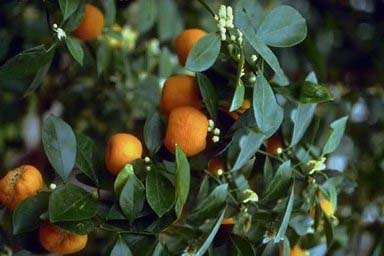

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image file
img_path = '/content/drive/MyDrive/Cm and Sp/Cm/Sp_S_CNN_A_pla0053_pla0053_0191.jpg' 
img = cv2.imread(img_path)

# Resize the image
new_size = (384, 256)
new_img = cv2.resize(img, new_size)

# Display the resized image
cv2_imshow(new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
new_img = new_img.astype(np.float32) # Convert the image to 32-bit float format
Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y, Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr, Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb = preprocess(new_img)
markov_matrix1 = apply_markov_process(Dhintra_y, Dvintra_y, Dhinter_y, Dvinter_y)
markov_matrix2 = apply_markov_process(Dhintra_cr, Dvintra_cr, Dhinter_cr, Dvinter_cr)
markov_matrix3 = apply_markov_process( Dhintra_cb, Dvintra_cb, Dhinter_cb, Dvinter_cb)
feature1 = markov_matrix1.flatten()
feature2 = markov_matrix2.flatten()
feature3 = markov_matrix3.flatten()
new_features = np.concatenate((feature1, feature2, feature3), axis=0)

In [ ]:
import joblib
import numpy as np

# Load the saved model from a file
filename = 'svm_model.joblib'
loaded_model = joblib.load(filename)

new_features = np.reshape(new_features, (1, -1))

# Make a prediction on the new image using the loaded model
prediction = loaded_model.predict(new_features)
print(prediction)
# Print the predicted label (0 for genuine, 1 for forged)
if prediction == 1:
    print("The image is authentic.")
else:
    print("The image is forged.")
    # Load the SVM model from disk
    svm_model = joblib.load('svm_model.pkl')

    # Extract features from a new image
    new_image = cv2.imread(img_path)
    new_features = extract_features(new_image)

    # Use the SVM model to predict the label of the new image
    new_prediction = svm_model.predict([new_features])[0]
    if new_prediction == 1:
      print('The image is spliced.')
    else:
      print('The image is copy-move.')


[0]
The image is forged.
The image is copy-move.
